In [2]:
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as wb
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30



from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams.update({'font.family' : 'sans'})
sm, med, lg = 10, 15, 20
plt.rc('font', size = sm)         # controls default text sizes
plt.rc('axes', titlesize = med)   # fontsize of the axes title
plt.rc('axes', labelsize = med)   # fontsize of the x & y labels
plt.rc('xtick', labelsize = sm)   # fontsize of the tick labels
plt.rc('ytick', labelsize = sm)   # fontsize of the tick labels
plt.rc('legend', fontsize = sm)   # legend fontsize
plt.rc('figure', titlesize = lg)  # fontsize of the figure title
plt.rc('axes', linewidth=2)       # linewidth of plot lines

import cufflinks as cf
cf.go_offline(connected=True)
import chart_studio.plotly as py
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

import seaborn as sns
sns.set()



from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels as stats
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
from mpl_finance import candlestick_ohlc



import yfinance as yf
from yahoofinancials import YahooFinancials
from yahoo_fin.stock_info import get_analysts_info
from yahoo_fin.stock_info import *
from urllib.request import urlopen
import requests

import itertools
import locale, sys 
from datetime import date, datetime, timedelta
import time, csv, json, os
from patsy import dmatrices

from IPython.display import IFrame
# ![img](images/paintcarelogo.png)

import warnings
warnings.filterwarnings('ignore')

print('\n          * * * NO ISSUES - ALL IMPORTS LOADED * * * \n')


          * * * NO ISSUES - ALL IMPORTS LOADED * * * 



# Standard Inputs:

In [2]:
start = datetime(2018, 1, 2)
end = datetime.now()

ticker = 'TSLA'
# ticker = input('Ticker: ')
tickers = [ticker, '^GSPC', '^IXIC', '^DJI']

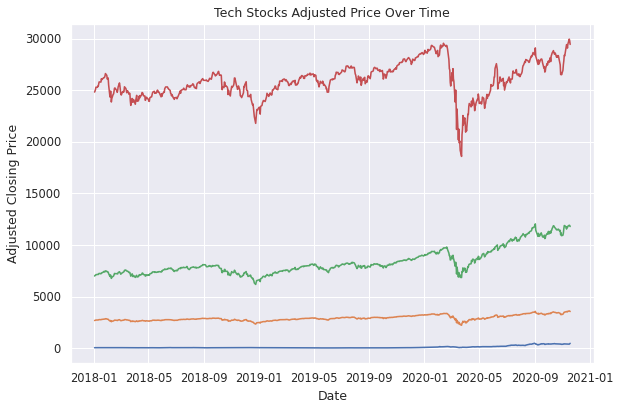

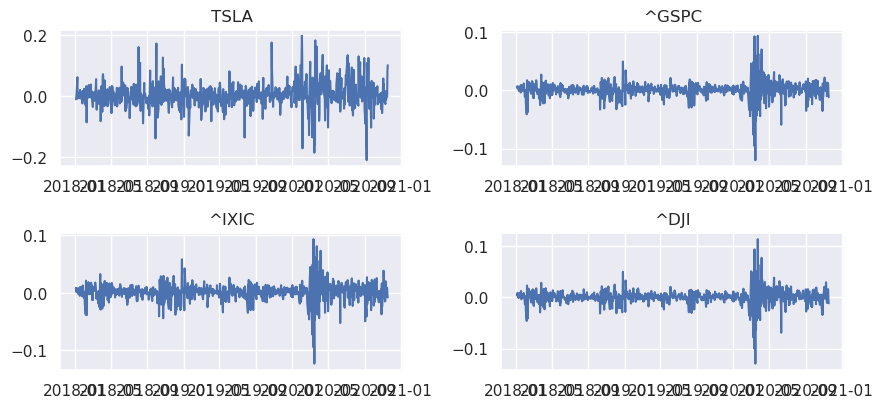

In [7]:
stock_data = wb.get_data_yahoo(tickers, start = start, end=end)['Adj Close']


# def stock_predict(ticker):
#     today = dt.date.today()
#     one_year = dt.timedelta(days=365)
#     one_year_ago = today - one_year

#     data_price = data_df['Close'].values
#     data_np = data_df.values

fig = plt.figure(figsize=(9,6), dpi = 75)

plt.plot(stock_data)
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Tech Stocks Adjusted Price Over Time")


fig = plt.figure(figsize=(9,6), dpi = 100)

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)

ax1.plot(stock_data[tickers[0]].pct_change())
ax1.set_title(tickers[0])
ax2.plot(stock_data[tickers[1]].pct_change())
ax2.set_title(tickers[1])
ax3.plot(stock_data[tickers[2]].pct_change())
ax3.set_title(tickers[2])
ax4.plot(stock_data[tickers[3]].pct_change())
ax4.set_title(tickers[3])
plt.tight_layout()

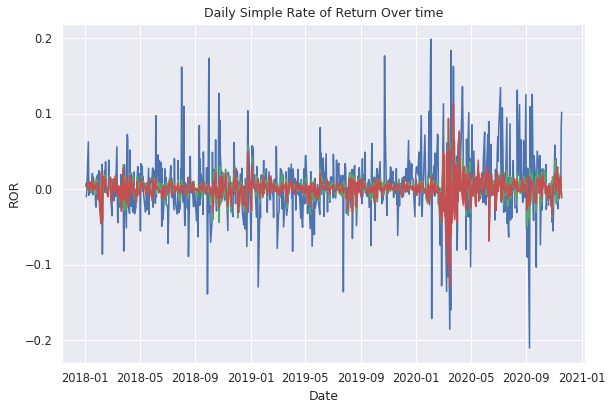

In [13]:
stock_data_daily_returns = stock_data.pct_change()

fig = plt.figure(figsize=(9,6), dpi = 75)

plt.plot(stock_data_daily_returns)
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time");

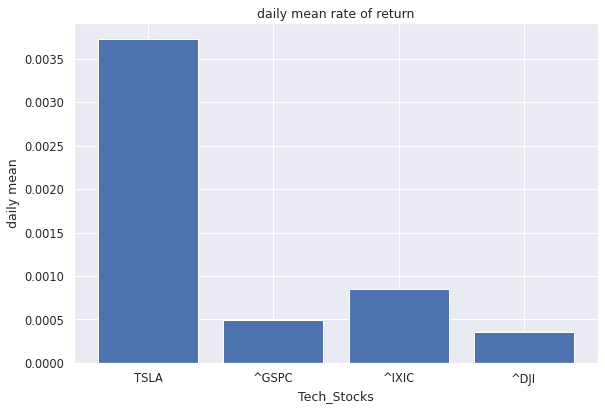

In [16]:
# calculate daily mean
daily_mean = stock_data_daily_returns.mean()

# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])

# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))

# plot bars
fig = plt.figure(figsize=(9,6), dpi = 75)

plt.bar(x_pos, height)
plt.xticks(x_pos, daily_mean.keys())
plt.xlabel("Tech_Stocks")
plt.ylabel("daily mean")
plt.title("daily mean rate of return");

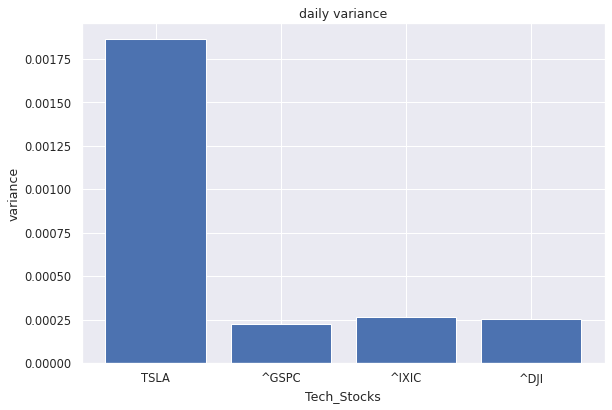

In [17]:
# calculate variance
daily_var = stock_data_daily_returns.var()

# grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])

# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))

# plot bars
fig = plt.figure(figsize=(9,6), dpi = 75)

plt.bar(x_pos, height)
plt.xticks(x_pos, daily_var.keys())
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance");

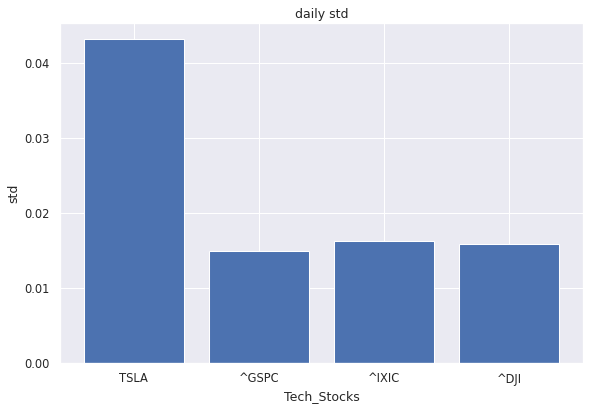

In [18]:
# calculate standard deviation
daily_std = stock_data_daily_returns.std()

# grab each standard deviation value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])

# arrange keys on x axis based on length
x_pos = np.arange(len(daily_std.keys()))

# plot bars
fig = plt.figure(figsize=(9,6), dpi = 75)

plt.bar(x_pos, height)
plt.xticks(x_pos, daily_std.keys())
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std");

In [19]:
stock_data_daily_returns.corr()

Symbols,TSLA,^GSPC,^IXIC,^DJI
Symbols,,,,
TSLA,1.000000,0.436644,0.504513,0.406558
^GSPC,0.436644,1.000000,0.957667,0.978878
^IXIC,0.504513,0.957667,1.000000,0.900916
^DJI,0.406558,0.978878,0.900916,1.000000
